
## Описание проекта

- Нужно защитить данные клиентов страховой компании «Хоть потоп».  
- Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.
- Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

<div style="border:solid gray 2px; padding: 20px">

**Инструкция по выполнению проекта**

- **Загрузите и изучите данные.**  
- **Ответьте на вопрос и обоснуйте решение**.  
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)  
a. Изменится. Приведите примеры матриц.  
b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.  
- **Предложите алгоритм** преобразования данных для решения задачи.  
Обоснуйте, почему качество линейной регрессии не поменяется.  
- **Запрограммируйте этот алгоритм**, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

---

## Загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

RANDOM = 12345

In [2]:
pth1 = '/Users/macbookair13i5/Desktop/datasets/Datasets/insurance.csv'
pth2 = '/datasets/insurance.csv'
pth3 = 'https://code.s3.yandex.net/datasets/insurance.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
elif os.path.exists(pth3):
    df = pd.read_csv(pth3)
else:
    display('Something is wrong')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
# Наличие дубликатов

df.duplicated().sum()

153

Дубликаты присутствуют, но оставим их (по условию проекта чистые данные не особо нужны)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
# Числовые столбцы

numeric = ['Возраст', 'Зарплата', 'Члены семьи']

In [7]:
# Переведем значения зарплаты в (тыс. руб)

df['Зарплата'] = df['Зарплата'].values/1000

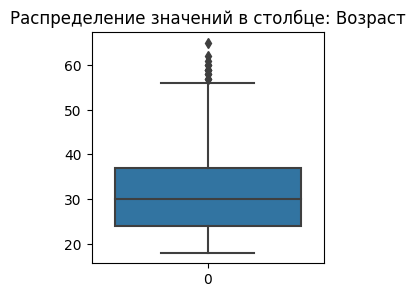

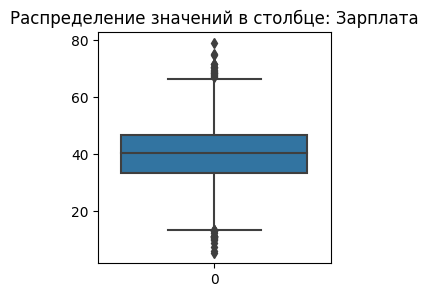

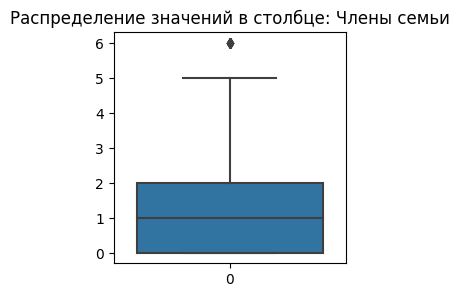

In [8]:
# Посмотрим распределение значений и выбросы

for col in df[numeric]:
    fig, ax = plt.subplots(figsize = (3,3))
    sns.boxplot(data = df[col]
               )
    ax.set_title(f'Распределение значений в столбце: {col}')

В данных присутствуют выбросы (оставим без обработки)

### Выделение признаков, Обучающей, Тестовой выборок

In [9]:
features = df.drop(['Страховые выплаты'], axis = 1)
target = df['Страховые выплаты']

In [10]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.25, random_state = RANDOM)

---

## Вопросы проекта

**Ответьте на вопрос** и обоснуйте решение.  

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)  
a. Изменится. Приведите примеры матриц.  
b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

<div style="border:solid gray 2px; padding: 20px">
    
**X** — матрица признаков (нулевой столбец состоит из единиц)

**P** — матрица, на которую умножаются признаки

$a$ - предсказания
    
$y$ — вектор целевого признака

$w$ — вектор весов линейной регрессии

### Неизмененная матрица значений

Предсказания:
<div style="border:solid gray 2px; padding: 20px">
$$a = Xw +w0$$
    
где 
$w_0$ - значение нулевого аргумента вектора $w$, которое предствляет собой величину сдвига модели, при подборе которого можно достигать более низкого значения среднеквадратичного отклонения ($MSE$)  
    
После добавления в нулевой столбец единиц Сдвиг умножится на вектор из единиц (нулевой столбец). Получим такой вектор предсказаний a:
$$a = Xw$$

Задача Обучения:
<div style="border:solid gray 2px; padding: 20px">
$$w = arg min_w MSE (Xw, y)$$

Формула Обучения:
<div style="border:solid gray 2px; padding: 20px">
$$w = (X^TX)^{-1}X^Ty$$
    
Подставив значения $w$ в формулу получим предсказания:
$$a = X(X^TX)^{-1}X^Ty$$
$$a = XX^{-1}(X^T)^{-1}X^Ty$$
$$a = EEy$$

### Свойства умножения матриц

**Свойства умножения матриц (некооторые):** 
<div style="border:solid gray 2px; padding: 20px">
$$A(BC) = (AB)C$$

$$(AB)^{-1} = B^{-1}A^{-1}$$  

$$(AB)^T = B^TA^T$$
$$(A^T)^{-1} = (A^{-1})^T$$
$$(ABC)^{-1} = C^{-1}B^{-1}A^{-1}$$
$$AA^{-1} = E$$
$$AE = EA = A$$
Умножение на нулевую матрицу:
$$AO = O$$ O - нулевая необратимая матрица


### Измененная матрица значений

**Формула Изменённой матрицы:**
<div style="border:solid gray 2px; padding: 20px">
$$X_1 = XP$$

**Изменённая формула обучения:** 
<div style="border:solid gray 2px; padding: 20px">
$$w_1 = (X_1^TX_1)^{-1}X_1^Ty$$ 
$$a_1 = X_1w_1$$  
    
Подставим значение $X_1$  
    
$$w_1 = ((XP)^TXP)^{-1}(XP)^Ty$$
$$a_1 = X_1(X_1^TX_1)^{-1}X_1^Ty$$
    
Раскроем формулу согласно свойствам матричного умножения  
    
$$a_1 = XP((XP)^TXP)^{-1}XP^Ty$$
$$a_1 = XP(XP)^{-1}(XP)^T)^{-1}(XP)^Ty$$
$$a_1 = EEy$$

<div style="border:solid gray 2px; padding: 20px">
    
Раскроем формулу $w$
$$w = (X^T X)^{-1} X^T y$$

---

Раскроем формулу $w_P$    
$$w_P = ((XP)^T XP)^{-1} (XP)^T y$$
$$w_P = ((P^TX^T)XP)^{-1}(P^TX^T)y$$
    

Три квадратные матрицы (в -1):
$$w_P = (P^T(X^TX)P)^{-1}(P^TX^T)y$$
$$w_P = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty$$
$$w_P = P^{-1}(X^TX)^{-1}X^Ty$$
$$w_P = P^{-1}w$$

---
Предсказания в исходных и преобразованных прихнаках
$$a = Xw$$
$$a_P = XPw_P$$
$$a_P = XPP^{-1}w$$
$$a_P = Xw$$
$$a = a_P$$


Задача обучения:

$$\arg\min_w MSE(XPw_p, y) = $$
$$ = \arg\min_w MSE(XPP^{-1}w, y) = $$
$$ = \arg\min_w MSE(Xw, y)$$


### Выводы

**Формулы предсказаний измененной и неизмененной матриц**
<div style="border:solid gray 2px; padding: 20px">

    
$$a = Xw$$
$$a_P = Xw$$
$$a = a_P$$

**Для защиты персональных данных клиентов можно воспользоваться умножением матрицы значений на рандомную матрицу!Можно сделать вывод, что результат предсказания не изменится не смотря на измениения значений признаков**  
  
**Не изменится и качество Линейной регрессии (При умножении на ненулевую матрицу)**


**Качество Линейной Регрессии изменится если исходную матрицу со значениями данных клиентов умножить на нулевую (необратимую) матрицу**

---

## Линейная Регрессия на неизменённых признаках (sklearn)

In [11]:
#  Сначала воспользуемся моделью из sklearn

model_before = LinearRegression()
model_before.fit(features_train, target_train)
predictions_before = model_before.predict(features_test)

In [12]:
metric_values = []

In [13]:
# Посмотрим на метрики модели на исходных признаках (sklearn)

R2_before = r2_score(target_test, predictions_before)
MSE_before = mean_squared_error(target_test, predictions_before)
print('Метрики на исходных признаках')
print(f'R2: {R2_before}')
print(f'MSE: {MSE_before}')
values = [R2_before, MSE_before]
metric_values.append(values)

Метрики на исходных признаках
R2: 0.4352275712702667
MSE: 0.11660517472525564


---

## Класс Линейной Регрессии

### Неизменённые Признаки

**Предсказания вычислим по формуле:**
$$a = Xw +w0$$
$$a = X(X^TX)^{-1}X^Ty + w0$$

In [14]:
# Создадим класс Линейной Регрессии

class LinRegression:
    def fit(self, features, target):
        X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
        y = target
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w = w[1:]
        self.w_0 = w[0]
        
    def predict(self, new_features):
        return new_features @ self.w + self.w_0
        

In [15]:
model = LinRegression()

In [16]:
model.fit(features_train, target_train)
predictions_after = model.predict(features_test)

In [17]:
R2_class = r2_score(target_test, predictions_after)
MSE_class = mean_squared_error(target_test, predictions_after)
values = [R2_class, MSE_class]
metric_values.append(values)
print(f'R2 класса Л.Регрессии: {R2_class}')
print(f'MSE класса Л.Регрессии: {MSE_class}')

R2 класса Л.Регрессии: 0.43522757127026657
MSE класса Л.Регрессии: 0.11660517472525567


### Изменённые признаки

**Необходимо**

- Сгенерировать обратимую квадратную матрицу, размерностью соответствующую количеству столбцов признаков  
- Умножить матрицу исходных признаков на сгенерированную матрицу.  

- Посчитать качество модели на полученной матрице и сравнить с качеством модели на матрице исходных данных.

In [18]:
# Создадим случайную квадратную матрицу

P = np.random.normal(size = (features_train.shape[1],features_train.shape[1]))

In [19]:
print(np.linalg.inv(P))

[[-0.10213921  0.0166804   0.5571037   0.26410603]
 [-0.18738166 -0.47441747 -0.17103305  0.37025258]
 [ 0.08003576 -0.3990928  -0.02047582  0.04052833]
 [ 0.11456287  0.00091072  0.06260915  0.41004133]]


In [20]:
# Умножим матрицы значений в обучающей и тестовой выборках на одну случайную обратимую квадратную матрицу

features_train_after = features_train.values @ P
features_test_after = features_test.values @ P

In [21]:
# Обучим модель класса linRegression на измененных признаках

model.fit(features_train_after, target_train)
predictions_after = model.predict(features_test_after)

In [22]:
# Посмотрим на значения метрик модели и сравним с значениями до преобразования

R2_after = r2_score(target_test, predictions_after)
MSE_after = mean_squared_error(target_test, predictions_after)
print(f'R2 После преобразования признаков: {R2_after}')
print(f'MSE После преобразования признаков: {MSE_after}')
values = [R2_after, MSE_after]
metric_values.append(values)

R2 После преобразования признаков: 0.435227571270267
MSE После преобразования признаков: 0.11660517472525557


In [23]:
# Посмотрим на все показатели метрик

report = pd.DataFrame(np.array(metric_values).T, index = ['R2', 'MSE'], columns = ['Linear_sklearn', 'classLinRegression_before', 'classLinRegression_after'])
report

,Linear_sklearn,classLinRegression_before,classLinRegression_after
R2,0.435228,0.435228,0.435228
MSE,0.116605,0.116605,0.116605


Показатели метрик никак не поменялись при преобразовании признаков, поэтому Умножение матрицы значений персональных данных клиентов на случайную обратимую матрицу является способом защитить данные от использования третьими лицами!

---

## Общий вывод по проекту

<div style="border:solid gray 2px; padding: 20px">

**В этом проекте:**  

- Для защиты персональных данных клиентов страховой компании с помощью преобразования значений (умножением на случайную матрицу) проверили изменится ли качество линейной регрессии?
Выяснили, что результат предсказания не изменится не смотря на измениения значений признаков
Не изменится и качество Линейной регрессии (При умножении на ненулевую матрицу)
Качество Линейной Регрессии изменится в случае, если исходную матрицу со значениями данных клиентов умножить на нулевую (необратимую) матрицу.

- Предложили алгоритм преобразования данных для решения этой задачи.  
При проверке качества модели показатели метрик никак не поменялись при преобразовании признаков, поэтому Умножение матрицы значений персональных данных клиентов на случайную обратимую матрицу является способом защитить данные от использования третьими лицами!